# Question 1

In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/amex-competition/dataset/sample_submission.csv
/kaggle/input/amex-competition/dataset/train.csv
/kaggle/input/amex-competition/dataset/test.csv


In [60]:
import os
import pandas as pd
import numpy as np


In [61]:
data=pd.read_csv("/kaggle/input/titanic/train.csv")

In [62]:
data.shape

(891, 12)

In [63]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [65]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [67]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [69]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [70]:
data['Survived'].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

### VISUALIZATIONS

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Fare for each different age people')

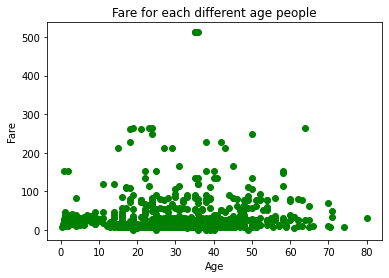

In [72]:
#Plot two numerical columns.
plt.scatter(data["Age"], data["Fare"], color="green")
plt.ylabel("Fare")
plt.xlabel("Age")
plt.title("Fare for each different age people")

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

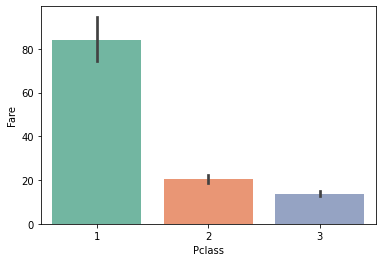

In [73]:
#Plot one numerical and one categorical column.
sns.barplot(data=data, x="Pclass", y="Fare", palette="Set2")

<AxesSubplot:xlabel='Pclass'>

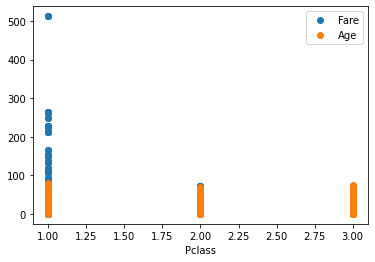

In [75]:
#Plot two numerical columns and one categorical column.
data.plot(x="Pclass", y=["Fare", "Age"],style='o')

In [76]:
obj_attr=data.select_dtypes('object').columns
for i in obj_attr:
  print(data[i].nunique())
  print(data[i].value_counts())

891
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
2
male      577
female    314
Name: Sex, dtype: int64
681
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
147
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cab

In [77]:
id = data['PassengerId']
data.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [78]:
#Check null values in a column.
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [79]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [80]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [81]:
data= pd.get_dummies(data=data, columns=['Pclass','Sex'], drop_first=False)

In [82]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,S,0,0,1,0,1
1,1,38.0,1,0,71.2833,C,1,0,0,1,0
2,1,26.0,0,0,7.9250,S,0,0,1,1,0
3,1,35.0,1,0,53.1000,S,1,0,0,1,0
4,0,35.0,0,0,8.0500,S,0,0,1,0,1


In [88]:
df1=pd.read_csv("/kaggle/input/amex-default-prediction/train_data.csv",nrows=200000)
df2=pd.read_csv("/kaggle/input/amex-default-prediction/train_labels.csv",nrows=200000)

In [86]:
df1.columns

Index(['customer_id', 'name', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

In [89]:
df2.columns

Index(['customer_ID', 'target'], dtype='object')

In [90]:
df1.shape

(200000, 190)

In [91]:
df2.shape

(200000, 2)

In [93]:
df1.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [94]:
df2.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [95]:
train_data=pd.merge(df1,df2)

In [97]:
train_data.shape

(200000, 191)

In [98]:
train_data.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,198458.000000,2.000000e+05,200000.000000,199928.000000,2.000000e+05,162335.000000,1.999280e+05,1.999280e+05,29193.000000,1.399420e+05,...,7.186000e+03,7186.000000,1.964970e+05,1.985810e+05,1.964970e+05,34356.000000,1.964970e+05,1.985670e+05,1.964970e+05,200000.000000
mean,0.653527,1.534126e-01,0.125356,0.616971,8.121541e-02,0.227386,6.221769e-02,1.343925e-01,0.181170,1.560354e-01,...,1.424359e-02,0.162349,1.798358e-01,2.622542e-02,1.653822e-01,0.392596,1.797362e-01,5.339187e-02,6.179908e-02,0.253395
std,0.246135,2.723813e-01,0.213396,0.402275,2.309947e-01,0.197101,2.081621e-01,2.348492e-01,0.216851,2.169740e-01,...,9.543979e-02,0.258647,3.798505e-01,1.441568e-01,3.490555e-01,0.238923,3.797464e-01,1.851044e-01,1.901802e-01,0.434956
min,-0.383019,3.892609e-07,-0.899396,0.000003,2.962930e-08,-0.254707,5.627163e-08,1.042180e-07,-0.000219,8.705647e-07,...,4.129697e-08,0.000002,7.139375e-08,5.277736e-08,5.642931e-08,-0.014441,1.653580e-08,1.161969e-07,3.397747e-08,0.000000
25%,0.476334,4.541390e-03,0.008858,0.100550,2.899612e-03,0.127432,2.897833e-03,5.290730e-03,0.039449,4.235285e-02,...,2.589397e-03,0.003541,3.018427e-03,2.551375e-03,3.033245e-03,0.196174,3.034162e-03,2.752575e-03,3.027842e-03,0.000000
50%,0.691541,9.066380e-03,0.031935,0.814164,5.792558e-03,0.164248,5.768750e-03,9.872834e-03,0.120749,8.828850e-02,...,5.141117e-03,0.007028,6.041458e-03,5.109293e-03,6.062756e-03,0.382038,6.077791e-03,5.499113e-03,6.059988e-03,0.000000
75%,0.863455,2.360171e-01,0.129569,1.002240,8.684554e-03,0.260202,8.652639e-03,1.635911e-01,0.250728,1.850985e-01,...,7.667529e-03,0.501621,9.096570e-03,7.658175e-03,9.094362e-03,0.566102,9.088631e-03,8.267479e-03,9.093526e-03,1.000000
max,1.009998,5.331360e+00,1.324053,1.010000,2.507711e+00,2.918675,6.798167e+00,1.625262e+00,3.252056,9.089694e+00,...,1.009913e+00,1.509486,1.010000e+00,1.009994e+00,1.174753e+00,1.751388,1.010000e+00,1.343284e+00,4.282032e+00,1.000000


In [99]:
train_data.describe(include='all')

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,200000,200000,198458.000000,2.000000e+05,200000.000000,199928.000000,2.000000e+05,162335.000000,1.999280e+05,1.999280e+05,...,7.186000e+03,7186.000000,1.964970e+05,1.985810e+05,1.964970e+05,34356.000000,1.964970e+05,1.985670e+05,1.964970e+05,200000.000000
unique,16576,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,13,933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.653527,1.534126e-01,0.125356,0.616971,8.121541e-02,0.227386,6.221769e-02,1.343925e-01,...,1.424359e-02,0.162349,1.798358e-01,2.622542e-02,1.653822e-01,0.392596,1.797362e-01,5.339187e-02,6.179908e-02,0.253395
std,NaN,NaN,0.246135,2.723813e-01,0.213396,0.402275,2.309947e-01,0.197101,2.081621e-01,2.348492e-01,...,9.543979e-02,0.258647,3.798505e-01,1.441568e-01,3.490555e-01,0.238923,3.797464e-01,1.851044e-01,1.901802e-01,0.434956
min,NaN,NaN,-0.383019,3.892609e-07,-0.899396,0.000003,2.962930e-08,-0.254707,5.627163e-08,1.042180e-07,...,4.129697e-08,0.000002,7.139375e-08,5.277736e-08,5.642931e-08,-0.014441,1.653580e-08,1.161969e-07,3.397747e-08,0.000000
25%,NaN,NaN,0.476334,4.541390e-03,0.008858,0.100550,2.899612e-03,0.127432,2.897833e-03,5.290730e-03,...,2.589397e-03,0.003541,3.018427e-03,2.551375e-03,3.033245e-03,0.196174,3.034162e-03,2.752575e-03,3.027842e-03,0.000000
50%,NaN,NaN,0.691541,9.066380e-03,0.031935,0.814164,5.792558e-03,0.164248,5.768750e-03,9.872834e-03,...,5.141117e-03,0.007028,6.041458e-03,5.109293e-03,6.062756e-03,0.382038,6.077791e-03,5.499113e-03,6.059988e-03,0.000000
75%,NaN,NaN,0.863455,2.360171e-01,0.129569,1.002240,8.684554e-03,0.260202,8.652639e-03,1.635911e-01,...,7.667529e-03,0.501621,9.096570e-03,7.658175e-03,9.094362e-03,0.566102,9.088631e-03,8.267479e-03,9.093526e-03,1.000000


In [100]:
train_data.dtypes

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
                ...   
D_142          float64
D_143          float64
D_144          float64
D_145          float64
target           int64
Length: 191, dtype: object

<AxesSubplot:xlabel='D_39'>

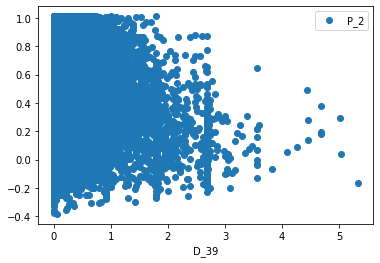

In [105]:
#Two numerical columns
train_data.plot(x='D_39', y='P_2', style='o')

<AxesSubplot:xlabel='B_30', ylabel='D_39'>

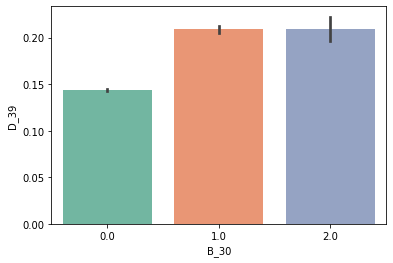

In [106]:
#Plot one numerical and one categorical column.
sns.barplot(data=train_data, x="B_30", y="D_39", palette="Set2")

<AxesSubplot:xlabel='B_30'>

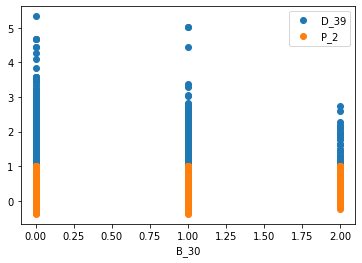

In [108]:
#Plot two numerical columns and one categorical column.
train_data.plot(x="B_30", y=['D_39', 'P_2'],style='o')

In [109]:
train_data.isnull().sum()

customer_ID         0
S_2                 0
P_2              1542
D_39                0
B_1                 0
                ...  
D_142          165644
D_143            3503
D_144            1433
D_145            3503
target              0
Length: 191, dtype: int64

In [111]:
i=0
for col in train_data.columns:
    if (train_data[col].isnull().sum()/len(train_data[col])*100) >=70:
        print("Dropping column", col)
        train_data.drop(labels=col,axis=1,inplace=True)
        i=i+1
        
print("Total number of columns dropped in train dataframe", i)

Dropping column D_42
Dropping column D_49
Dropping column D_53
Dropping column D_66
Dropping column D_73
Dropping column D_76
Dropping column R_9
Dropping column D_82
Dropping column B_29
Dropping column D_87
Dropping column D_88
Dropping column D_106
Dropping column R_26
Dropping column D_108
Dropping column D_110
Dropping column D_111
Dropping column B_39
Dropping column B_42
Dropping column D_132
Dropping column D_134
Dropping column D_135
Dropping column D_136
Dropping column D_137
Dropping column D_138
Dropping column D_142
Total number of columns dropped in train dataframe 25


In [112]:
train_data['target'].value_counts(normalize=True)*100

0    74.6605
1    25.3395
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

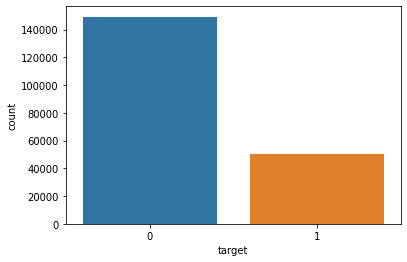

In [113]:
sns.countplot(x = 'target',data = train_data)